# **Tarea Nº 4**

- Fecha y hora de entrega: Domingo 12 de enero, 11:59pm
- Agregue los nombres de las personas con las que discutió esta tarea: ____ Armando Paredes ______
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom: 

### Evaluación

- Nota: **17/20**

¡Buen trabajo en general!

## **Mercado de autos usados**

Importa el conjunto de datos `neoauto_20240924.csv`
    

In [19]:
import pandas as pd

file_path = 'neoauto_20240924.csv'

neoauto_data = pd.read_csv(file_path)

neoauto_data.head()


,value,item_id,item_price,item_name,item_category,item_category_2,item_brand,item_km,item_year,item_transmission,...,item_location_province,item_tag,item_advertiser,item_credit,item_verified,item_financed_by,santander_price,item_publication_slug,item_publication_type,item_publication_type_Id
0,29200,1807331,29200.0,toyota hilux 2021,autos,Pick Up,TOYOTA,51635.0,2021,Mecánica,...,lima,Como nuevo,Erick Bazán Ubaldo,True,True,Santander,NaN,auto/usado/toyota-hilux-2021-1807331,PREMIUM,25
1,98500,1807393,98500.0,lexus lx 600 2023,autos,Camionetas Suv,LEXUS,15000.0,2023,Automática - Secuencial,...,lima,Como nuevo,Asesor Gabriel NovoCar,False,True,NaN,NaN,auto/usado/lexus-lx-600-2023-1807393,PREMIUM,25
2,16800,1739308,17800.0,bmw 520-i 2016,autos,Sedan,BMW,66000.0,2016,Automática - Secuencial,...,lima,Ocasión,Carlos Chauca,True,True,Santander,16800.0,auto/usado/bmw-520-i-2016-1739308,PREMIUM,25
3,15900,1805714,16900.0,chevrolet captiva 2021,autos,Camionetas Suv,CHEVROLET,40300.0,2021,Automática - Secuencial,...,santa,Premium,Darwin Américo Barrón Pastor,True,True,Santander,15900.0,auto/usado/chevrolet-captiva-2021-1805714,PREMIUM,25
4,12500,1806332,12500.0,dfsk glory 500 2023,autos,Camionetas Suv,DFSK,33000.0,2023,Mecánica,...,lima,Premium,GORDILLO FERNANDO,True,True,Santander,NaN,auto/usado/dfsk-glory-500-2023-1806332,PREMIUM,25


1. ¿Cuál es el precio promedio de los autos de cada marca (`item_brand`) publicados en cada subcategoría (`item_category_2`)?

In [20]:
precio_promedio = data.groupby(['item_brand', 'item_category_2'])['item_price'].mean().reset_index()

precio_promedio.columns = ['Marca', 'Subcategoría', 'Precio Promedio']

print(precio_promedio.head())

          Marca    Subcategoría  Precio Promedio
0    ALFA-ROMEO       Hatchback           8500.0
1    ALFA-ROMEO           Sedan           2500.0
2  ASTON MARTIN  Camionetas Suv         229000.0
3  ASTON MARTIN       Deportivo         169990.0
4  ASTON MARTIN           Sedan         149900.0


2. ¿Cuántos autos tienen más de 100,000 kilómetros (`item_km`) pero un precio (`item_price`) menor al promedio general?

In [21]:
precio_promedio_general = data['item_price'].mean()

autos_filtrados = data[(data['item_km'] > 100000) & (data['item_price'] < precio_promedio_general)]

cantidad_autos = autos_filtrados.shape[0]

print(f"El número de autos con más de 100,000 kilómetros y precio menor al promedio general es: {cantidad_autos}")


El número de autos con más de 100,000 kilómetros y precio menor al promedio general es: 497


3. Encuentra el modelo (`item_name`) más caro y el más barato de cada marca (`item_brand`).

In [38]:
mas_caro = data.loc[data.groupby('item_brand')['item_price'].idxmax()]
mas_barato = data.loc[data.groupby('item_brand')['item_price'].idxmin()]

modelos_extremos = pd.merge(
    mas_caro[['item_brand', 'item_name', 'item_price']],
    mas_barato[['item_brand', 'item_name', 'item_price']],
    on='item_brand',
    suffixes=('_Mas_Caro', '_Mas_Barato')
)

modelos_extremos.columns = ['Marca', 'Modelo_Mas_Caro', 'Precio_Mas_Caro', 'Modelo_Mas_Barato', 'Precio_Mas_Barato']

print(modelos_extremos.head())

          Marca          Modelo_Mas_Caro  Precio_Mas_Caro  \
0    ALFA-ROMEO      alfa-romeo 147 2006           8500.0   
1  ASTON MARTIN    aston martin dbx 2021         229000.0   
2          AUDI           audi rs 6 2024         220000.0   
3        AUSTIN  austin mini cooper 1970              1.0   
4          BAIC            baic x55 2021          12800.0   

         Modelo_Mas_Barato  Precio_Mas_Barato  
0  alfa-romeo alfasud 1982             2500.0  
1   aston martin db11 2017           149900.0  
2       audi a3 sedan 2015                0.0  
3  austin mini cooper 1970                1.0  
4           baic plus 2018             7500.0  


4. Encuentra las tres marcas con mayor número de autos financiados por Santander (`item_financed_by`). 

In [23]:
autos_santander = data[data['item_financed_by'] == 'Santander']

autos_por_marca = autos_santander['item_brand'].value_counts()

top_3_marcas = autos_por_marca.head(3)

print("Las tres marcas con mayor número de autos financiados por Santander son:")
print(top_3_marcas)


Las tres marcas con mayor número de autos financiados por Santander son:
item_brand
BMW       296
TOYOTA    261
NISSAN    228
Name: count, dtype: int64


5. Agrupa las publicaciones por tipo de transmisión (`item_transmission`) y calcula la desviación estándar del precio (`item_price`) para cada tipo.  

In [24]:
grouped_transmission = neoauto_data.groupby('item_transmission')

transmission_price_std_detailed = grouped_transmission['item_price'].std()

transmission_price_std_detailed_df = transmission_price_std_detailed.reset_index()
transmission_price_std_detailed_df.rename(columns={'item_price': 'price_std_dev'}, inplace=True)

transmission_price_std_detailed_df



,item_transmission,price_std_dev
0,Automática,15332.729048
1,Automática - Secuencial,22678.641589
2,Mecánica,8137.122127


6. ¿Cuál es el kilometraje promedio de las publicaciones con el tag "Premium" y de las publicaciones con el tag "Como nuevo"?

In [42]:
km_premium = data[data['item_tag'].str.contains('Premium', na=False)]['item_km'].mean()

km_como_nuevo = data[data['item_tag'].str.contains('Como nuevo', na=False)]['item_km'].mean()

print(f"El kilometraje promedio de las publicaciones con el tag 'Premium' es: {km_premium:.2f}")
print(f"El kilometraje promedio de las publicaciones con el tag 'Como nuevo' es: {km_como_nuevo:.2f}")



El kilometraje promedio de las publicaciones con el tag 'Premium' es: 48400.24
El kilometraje promedio de las publicaciones con el tag 'Como nuevo' es: 35963.48


7. ¿Cuáles son las marcas de vehículas para los que todos sus modelos fabricados en los últimos 5 años tienen al menos 5 publicaciones cada una?

In [54]:
from datetime import datetime
año_actual = datetime.now().year
vehiculos_recientes = data[data['item_year'] >= (año_actual - 5)]
publicaciones_por_modelo = vehiculos_recientes.groupby(['item_brand', 'item_name']).size().reset_index(name='conteo')
modelos_validos[modelos_validos['item_brand'].isin(marcas_cumplen)]
marcas_validas = modelos_validos.groupby('item_brand')['item_name'].nunique() == modelos_validos.groupby('item_brand')['item_name'].size()
marcas_cumplen = marcas_validas[marcas_validas & (modelos_validos.groupby('item_brand')['item_name'].nunique() >= 3)].index.tolist()
print(f"Marcas que cumplen con el criterio: {marcas_cumplen}")






Marcas que cumplen con el criterio: ['BMW', 'FORD', 'HYUNDAI', 'KIA', 'MAZDA', 'NISSAN', 'TOYOTA', 'VOLKSWAGEN']


## **Evolución económica internacional**

Importa el conjunto de datos de la hoja "Data" del archivo `pwt1001.xlsx`. El diccionario de variables está disponible en la hoja "Legend" del archivo Excel.
    

In [9]:
import pandas as pd


In [10]:
# Cargar la hoja "Data" del archivo pwt1001.xlsx
ruta_archivo = "pwt1001.xlsx"  # Asegúrate de que esté en el mismo directorio
hoja_datos = "Data"

# Leer la hoja "Data"
datos = pd.read_excel(ruta_archivo, sheet_name=hoja_datos)
# Ver la data y abrir en Data Wrangler
datos

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12805,ZWE,Zimbabwe,US Dollar,2015,40141.617188,39798.644531,13.814629,6.393752,NaN,2.584653,...,0.140172,-0.287693,-0.051930,0.479228,0.651287,0.541446,0.616689,0.533235,0.425715,1.778124
12806,ZWE,Zimbabwe,US Dollar,2016,41875.203125,40963.191406,14.030331,6.504374,NaN,2.616257,...,0.131920,-0.251232,-0.016258,0.470640,0.651027,0.539631,0.619789,0.519718,0.419446,1.728804
12807,ZWE,Zimbabwe,US Dollar,2017,44672.175781,44316.742188,14.236595,6.611773,NaN,2.648248,...,0.126722,-0.202827,-0.039897,0.473560,0.639560,0.519956,0.619739,0.552042,0.418681,1.756007
12808,ZWE,Zimbabwe,US Dollar,2018,44325.109375,43420.898438,14.438802,6.714952,NaN,2.680630,...,0.144485,-0.263658,-0.020791,0.543757,0.655473,0.529867,0.641361,0.561526,0.426527,1.830088


1. Calcule el PBI per cápita real ajustado por poder de paridad de compra (PPP). Use la variable de PBI que se calcula por gasto y la población. ¿Cuáles son los 10 países top?

In [11]:
# Solución
datos = pd.read_excel(ruta_archivo, sheet_name=hoja_datos)

# Verificar que las columnas necesarias estén presentes
if {'rgdpe', 'pop', 'country'}.issubset(datos.columns):
    # Calcular PBI per cápita ajustado por PPP
    datos['pbi_per_capita_ppp'] = datos['rgdpe'] / datos['pop']
    
    # Agrupar por país y calcular el promedio de PBI per cápita (en caso de varios años)
    pbi_por_pais = datos.groupby('country', as_index=False)['pbi_per_capita_ppp'].mean()
    
    # Ordenar por PBI per cápita en orden descendente
    top10_paises = pbi_por_pais.sort_values(by='pbi_per_capita_ppp', ascending=False).head(10)
    
    # Mostrar los 10 países principales
    print("Top 10 países por PBI per cápita ajustado por PPP:")
    print(top10_paises)
else:
    print("No se encuentran las columnas necesarias ('rgdpe', 'pop', 'country') en los datos.")

Top 10 países por PBI per cápita ajustado por PPP:
                  country  pbi_per_capita_ppp
173  United Arab Emirates       135685.412228
26      Brunei Darussalam        85153.100960
133                 Qatar        77240.759701
34         Cayman Islands        64819.047337
92                 Kuwait        52150.640948
100            Luxembourg        49328.308130
40       China, Macao SAR        45158.441251
19                Bermuda        44118.792348
159           Switzerland        39528.128690
175         United States        36517.219524


2. Genera el ránking de los países con el mayor incremento del PBI per cápita real PPP entre los años 1990 y 2019. ¿Dónde se ubica Perú? Para los países que no tengan información para dichos años, puede utilizar datos provenientes de hasta dos años antes o después

In [12]:
# Solución

datos = pd.read_excel(ruta_archivo, sheet_name=hoja_datos)

# Verificar que las columnas necesarias están presentes
if {'rgdpe', 'pop', 'year', 'country'}.issubset(datos.columns):
    # Calcular el PBI per cápita ajustado por PPP
    datos['pbi_per_capita_ppp'] = datos['rgdpe'] / datos['pop']
    
    # Filtrar los datos para los años 1990 y 2019
    datos_1990 = datos[(datos['year'] >= 1988) & (datos['year'] <= 1992)].groupby('country')['pbi_per_capita_ppp'].mean().reset_index()
    datos_2019 = datos[(datos['year'] >= 2017) & (datos['year'] <= 2021)].groupby('country')['pbi_per_capita_ppp'].mean().reset_index()
    
    # Renombrar columnas para identificar años
    datos_1990.rename(columns={'pbi_per_capita_ppp': 'pbi_1990'}, inplace=True)
    datos_2019.rename(columns={'pbi_per_capita_ppp': 'pbi_2019'}, inplace=True)
    
    # Combinar los datos de 1990 y 2019
    crecimiento = pd.merge(datos_1990, datos_2019, on='country', how='inner')
    
    # Calcular el incremento del PBI per cápita PPP
    crecimiento['incremento'] = crecimiento['pbi_2019'] - crecimiento['pbi_1990']
    
    # Ordenar por incremento descendente
    ranking = crecimiento.sort_values(by='incremento', ascending=False).reset_index(drop=True)
    
    # Agregar el ranking
    ranking['ranking'] = ranking.index + 1
    
    # Verificar la posición de Perú
    posicion_peru = ranking[ranking['country'] == 'Peru']
    
    # Mostrar el ranking y la posición de Perú
    print("Ranking de países con mayor incremento del PBI per cápita PPP (1990-2019):")
    print(ranking.head(10))  # Top 10 países
    print("\nPosición de Perú:")
    print(posicion_peru if not posicion_peru.empty else "Perú no se encuentra en los datos.")
else:
    print("No se encuentran las columnas necesarias ('rgdpe', 'pop', 'year', 'country') en los datos.")

Ranking de países con mayor incremento del PBI per cápita PPP (1990-2019):
                country      pbi_1990       pbi_2019    incremento  ranking
0      China, Macao SAR  27016.692600  107528.088227  80511.395627        1
1                 Qatar  26066.295030  106465.927895  80399.632864        2
2               Ireland  19040.395941   92959.449679  73919.053738        3
3             Singapore  21257.105474   87837.536901  66580.431427        4
4            Luxembourg  45881.393129  111780.927063  65899.533934        5
5               Bermuda  31750.475291   79662.836694  47912.361404        6
6                Norway  28383.595821   62803.079219  34419.483398        7
7                Kuwait  23515.121740   56835.097537  33319.975797        8
8                 Malta  14780.636963   48026.180186  33245.543223        9
9  China, Hong Kong SAR  26962.554047   59869.303686  32906.749639       10

Posición de Perú:
   country    pbi_1990     pbi_2019  incremento  ranking
82    Peru  3

3. Para el periodo 2010-2019, calcule el promedio del índice del capital humano. ¿Qué relación existe entre esta variable y el PBI per cápita real PPP calculado previamente? ¿y el número de horas laboradas al año por los trabajadores?

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

Relación entre el índice de capital humano y el PBI per cápita real PPP:
               country  promedio_hc  promedio_avh  promedio_pbi_per_capita
0              Albania     2.934304           NaN             11029.751620
1              Algeria     2.207947           NaN             12797.237930
2               Angola     1.449344           NaN              7627.644937
3             Anguilla          NaN           NaN             27167.015652
4  Antigua and Barbuda          NaN           NaN             20046.143125
5            Argentina     2.961662   1693.416337             21492.060853
6              Armenia     3.123577           NaN             10879.322226
7                Aruba          NaN           NaN             38145.486904
8            Australia     3.489004   1746.412122             49392.158049
9              Austria     3.331753   1629.475719             51477.323055


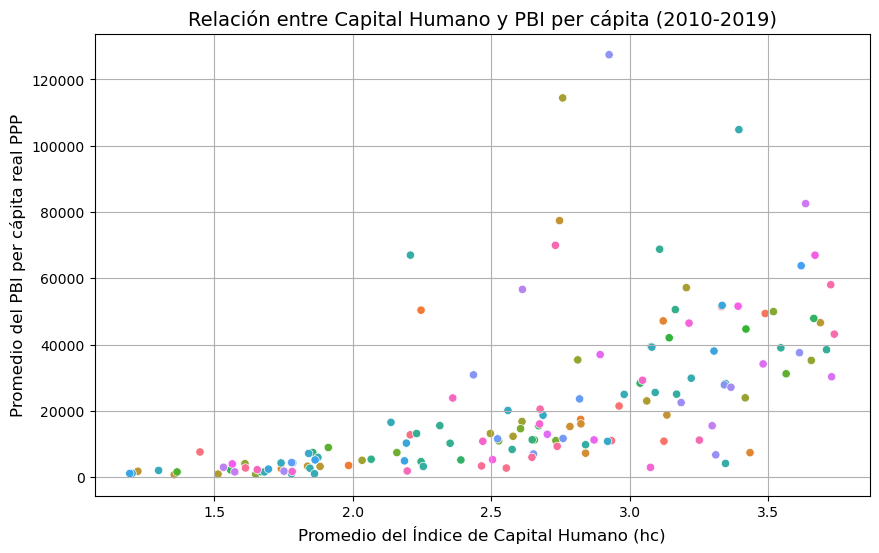

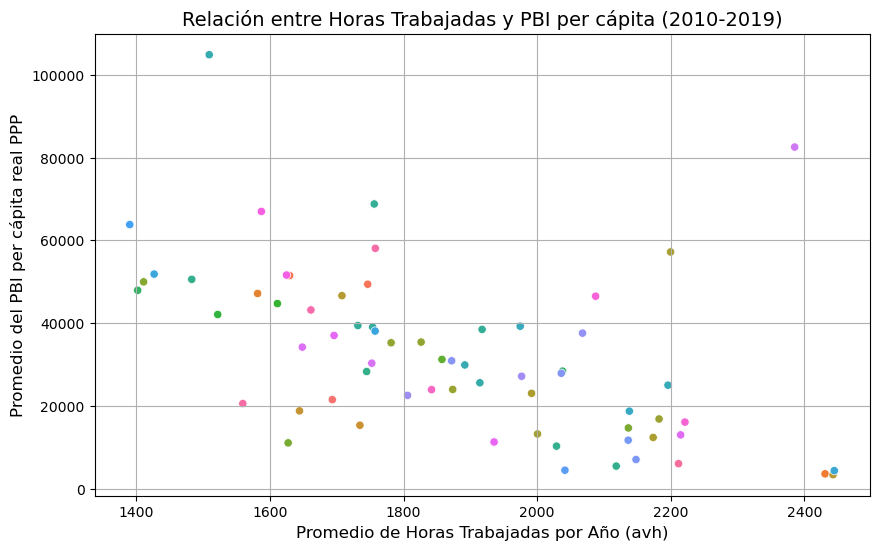

In [14]:
# Solución

datos = pd.read_excel(ruta_archivo, sheet_name=hoja_datos)

# Verificar que las columnas necesarias estén presentes
if {'rgdpe', 'pop', 'year', 'country', 'hc', 'avh'}.issubset(datos.columns):
    # Calcular el PBI per cápita ajustado por PPP
    datos['pbi_per_capita_ppp'] = datos['rgdpe'] / datos['pop']
    
    # Filtrar los datos para el periodo 2010-2019
    datos_periodo = datos[(datos['year'] >= 2010) & (datos['year'] <= 2019)]
    
    # Calcular el promedio del índice de capital humano y de horas trabajadas por país
    promedio_hc = datos_periodo.groupby('country')['hc'].mean().reset_index(name='promedio_hc')
    promedio_avh = datos_periodo.groupby('country')['avh'].mean().reset_index(name='promedio_avh')
    promedio_pbi = datos_periodo.groupby('country')['pbi_per_capita_ppp'].mean().reset_index(name='promedio_pbi_per_capita')
    
    # Combinar los resultados en un único DataFrame
    resultados = promedio_hc.merge(promedio_avh, on='country').merge(promedio_pbi, on='country')
    
    # Explorar la relación entre el capital humano y el PBI per cápita
    print("Relación entre el índice de capital humano y el PBI per cápita real PPP:")
    print(resultados.head(10))  # Mostrar los primeros 10 resultados

        # Graficar la relación entre capital humano y PBI per cápita
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=resultados, x='promedio_hc', y='promedio_pbi_per_capita', hue='country')
    plt.title('Relación entre Capital Humano y PBI per cápita (2010-2019)', fontsize=14)
    plt.xlabel('Promedio del Índice de Capital Humano (hc)', fontsize=12)
    plt.ylabel('Promedio del PBI per cápita real PPP', fontsize=12)
    plt.legend([], [], frameon=False)  # Quitar la leyenda
    plt.grid(True)
    plt.show()
    
    # Graficar la relación entre horas trabajadas y PBI per cápita
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=resultados, x='promedio_avh', y='promedio_pbi_per_capita', hue='country')
    plt.title('Relación entre Horas Trabajadas y PBI per cápita (2010-2019)', fontsize=14)
    plt.xlabel('Promedio de Horas Trabajadas por Año (avh)', fontsize=12)
    plt.ylabel('Promedio del PBI per cápita real PPP', fontsize=12)
    plt.legend([], [], frameon=False)  # Quitar la leyenda
    plt.grid(True)
    plt.show()
else:
    print("No se encuentran las columnas necesarias ('rgdpe', 'pop', 'year', 'country', 'hc', 'avh') en los datos.")

4. A partir de la variable del precio de los hogares, calcula los países y los años en los cuales se registró la mayor inflación anual para todo el periodo de tiempo disponible en la base de datos

In [23]:
# Solución

if 'pl_c' in datos.columns:
    # Calcular la inflación anual (cambio porcentual de pl_c)
    datos['inflacion'] = datos.groupby('country')['pl_c'].pct_change() * 100

    # Identificar el país y año con la mayor inflación
    max_inflacion = datos.loc[datos['inflacion'].idxmax()]
    
    print("País y año con mayor inflación:")
    print(f"País: {max_inflacion['country']}, Año: {max_inflacion['year']}, Inflación: {max_inflacion['inflacion']:.2f}%")
else:
    print("La variable 'pl_c' no está disponible en los datos.")

País y año con mayor inflación:
País: Venezuela (Bolivarian Republic of), Año: 2017, Inflación: 355.75%


C:\Users\jmoli\AppData\Local\Temp\ipykernel_71108\1710627984.py:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  datos['inflacion'] = datos.groupby('country')['pl_c'].pct_change() * 100


5. ¿Cuáles son los países con la mayor cantidad de missing values en la variable de productividad total de factores a precios corrientes?

In [24]:
# Solución

if 'ctfp' in datos.columns:
    # Contar los missing values por país
    missing_ctfp = datos[datos['ctfp'].isna()].groupby('country').size().reset_index(name='missing_count')
    
    # Ordenar por cantidad de missing values
    top_missing_ctfp = missing_ctfp.sort_values(by='missing_count', ascending=False).head(10)
    
    print("Países con mayor cantidad de missing values en 'ctfp':")
    print(top_missing_ctfp)
else:
    print("La variable 'ctfp' no está disponible en los datos.")

Países con mayor cantidad de missing values en 'ctfp':
                            country  missing_count
0                           Albania             70
168                    Turkmenistan             70
148       Sint Maarten (Dutch part)             70
71                          Grenada             70
69                            Ghana             70
67                          Georgia             70
66                           Gambia             70
154  St. Vincent and the Grenadines             70
126                        Pakistan             70
61                         Ethiopia             70


6.  Agrupa los datos por país y calcula el promedio de las horas trabajadas anuales (avh) y de la educación promedio (hc) para el periodo 2000-2020.

In [25]:
# Solución

if {'avh', 'hc'}.issubset(datos.columns):
    # Filtrar los datos para el periodo 2000-2020
    datos_periodo = datos[(datos['year'] >= 2000) & (datos['year'] <= 2020)]
    
    # Calcular los promedios por país
    promedios = datos_periodo.groupby('country')[['avh', 'hc']].mean().reset_index()
    promedios.rename(columns={'avh': 'promedio_avh', 'hc': 'promedio_hc'}, inplace=True)
    
    print("Promedio de horas trabajadas y educación promedio (2000-2020):")
    print(promedios.head(10))  # Mostrar los primeros 10 resultados
else:
    print("Las variables 'avh' o 'hc' no están disponibles en los datos.")

Promedio de horas trabajadas y educación promedio (2000-2020):
               country  promedio_avh  promedio_hc
0              Albania           NaN     2.895579
1              Algeria           NaN     2.080837
2               Angola           NaN     1.399746
3             Anguilla           NaN          NaN
4  Antigua and Barbuda           NaN          NaN
5            Argentina   1732.549733     2.859469
6              Armenia           NaN     3.112124
7                Aruba           NaN          NaN
8            Australia   1772.472936     3.489001
9              Austria   1690.755471     3.261355


7.  Genere una variable que ordene a los países según el porcetaje de formación brutal de capital del 2019. Luego, estable diez grupos a manera de deciles. ¿En qué decil se ubica Péru? Vuelva a calcular usando la información de 1990. ¿El Perú se mantiene en el mismo décil o cambia?

In [26]:
# Solución
if {'year', 'country', 'csh_i'}.issubset(datos.columns):
    # Filtrar los datos para 2019
    datos_2019 = datos[datos['year'] == 2019][['country', 'csh_i']].dropna()
    datos_2019['decile_2019'] = pd.qcut(datos_2019['csh_i'], q=10, labels=False) + 1

    # Filtrar los datos para 1990
    datos_1990 = datos[datos['year'] == 1990][['country', 'csh_i']].dropna()
    datos_1990['decile_1990'] = pd.qcut(datos_1990['csh_i'], q=10, labels=False) + 1

    # Verificar la posición de Perú en ambos años
    posicion_peru_2019 = datos_2019[datos_2019['country'] == 'Peru']
    posicion_peru_1990 = datos_1990[datos_1990['country'] == 'Peru']

    # Mostrar resultados
    print("Distribución en deciles para 2019:")
    print(datos_2019.sort_values(by='csh_i', ascending=False).head(10))  # Top 10 países
    print("\nDistribución en deciles para 1990:")
    print(datos_1990.sort_values(by='csh_i', ascending=False).head(10))  # Top 10 países

    print("\nPosición de Perú en 2019:")
    print(posicion_peru_2019 if not posicion_peru_2019.empty else "Perú no tiene datos para 2019.")

    print("\nPosición de Perú en 1990:")
    print(posicion_peru_1990 if not posicion_peru_1990.empty else "Perú no tiene datos para 1990.")
else:
    print("Las columnas necesarias ('year', 'country', 'csh_i') no están disponibles en los datos.")

Distribución en deciles para 2019:
                     country     csh_i  decile_2019
3359                Djibouti  0.616744           10
5599                 Ireland  0.569862           10
9799                   Qatar  0.525012           10
7629                Maldives  0.468125           10
2379                   China  0.454168           10
559      Antigua and Barbuda  0.384608           10
10639               Suriname  0.377080           10
9029                   Nepal  0.370384           10
6509   Saint Kitts and Nevis  0.367369           10
909                  Belgium  0.360464           10

Distribución en deciles para 1990:
                  country     csh_i  decile_1990
8300           Montserrat  0.909839           10
2840           Cabo Verde  0.533093           10
180              Anguilla  0.515634           10
10260           Singapore  0.450705           10
11030          Seychelles  0.440294           10
6200           Kazakhstan  0.428977           10
9910   Russian

## **Transacciones Financieras**

Importa el conjunto de datos `base_financiera.csv`
    

In [2]:
import pandas as pd
file_pat= 'base_financiera.csv'
base_financiera_data = pd.read_csv(file_pat)
base_financiera_data.head()


,Transaction_ID,Customer_ID,Date,Amount,Transaction_Type,Region
0,1001,C190,2023-01-01,798.68,Credit,North
1,1002,C016,2023-01-02,906.97,Debit,South
2,1003,C033,2023-01-03,1579.96,Debit,South
3,1004,C142,2023-01-04,1579.62,Credit,East
4,1005,C035,2023-01-05,3719.21,Debit,North


8. Filtra todas las transacciones de tipo "Debit" en las que el monto sea mayor a 200, y calcula el monto total de esas transacciones. Además, determina cuántos clientes únicos realizaron esas transacciones.

In [15]:
# Solución
transac_debit = base_financiera_data[(base_financiera_data['Amount'] > 200) & (base_financiera_data['Transaction_Type'] == "Debit")]
sin_dup=transac_debit.drop_duplicates(subset='Customer_ID')
cantidad_de_clientes_unicos = sin_dup.shape[0]
#unic_cli=cantidad_de_clientes.drop
print(transac_debit)
print(sin_dup)
print(cantidad_de_clientes_unicos)

      Transaction_ID Customer_ID        Date   Amount Transaction_Type Region
1               1002        C016  2023-01-02   906.97            Debit  South
2               1003        C033  2023-01-03  1579.96            Debit  South
4               1005        C035  2023-01-05  3719.21            Debit  North
5               1006        C078  2023-01-06  3127.58            Debit   West
8               1009        C031  2023-01-09  4044.73            Debit   West
...              ...         ...         ...      ...              ...    ...
2016            1747        C171  2023-01-27  2498.66            Debit   West
2021            2665        C072  2023-01-25  3060.79            Debit  South
2026            2180        C072  2023-01-20  4406.49            Debit  South
2027            1965        C022  2023-01-05   676.48            Debit  North
2028            1793        C107  2023-02-02  4099.63            Debit  North

[1094 rows x 6 columns]
      Transaction_ID Customer_ID       

9. Identifica las transacciones con valores nulos en la columna (`Amount`) . Rellena esos valores con la mediana de los montos por tipo de transacción (`Transaction_Type`) y luego calcula el monto total de transacciones por región (`region`) .

In [3]:
# Solución
only_credit = base_financiera_data[base_financiera_data['Transaction_Type']=='Credit']
media_credit = only_credit['Amount'].mean()
only_debit = base_financiera_data[base_financiera_data['Transaction_Type']=='Debit']
media_debit = only_debit['Amount'].mean()
#print(base_financiera_data)
print(base_financiera_data['Amount'].isnull().sum())
#rellenamos valores
base_financiera_data['Amount'] = base_financiera_data.groupby(['Transaction_Type', 'Region'])['Amount'].transform(lambda x: x.fillna(x.mean()))
#print(base_financiera_data)
print(base_financiera_data['Amount'].isnull().sum())
#calculamos el monto total por regiones
region_sums = base_financiera_data.groupby('Region')['Amount'].sum()
print(region_sums)


113
0
Region
East     1.268184e+06
North    1.324418e+06
South    1.209018e+06
West     1.235393e+06
Name: Amount, dtype: float64


10. Busca transacciones duplicadas considerando las columnas (`Customer_ID`) y (`Date`). Elimina los duplicados manteniendo solo la primera ocurrencia. Luego, agrupa las transacciones restantes por (`Customer_ID`) y calcula el monto promedio y la cantidad de transacciones por cliente.

In [ ]:
# Solución
duplicados = base_financiera_data[base_financiera_data.duplicated(subset=['Customer_ID', 'Date'], keep=False)]
print(duplicados)
#print(base_financiera_data)

no_duplicados = base_financiera_data.drop_duplicates(subset=['Customer_ID', 'Date'])
#print(no_duplicados)

grup_CID = no_duplicados.groupby('Customer_ID')
promedio = grup_CID['Amount'].mean()
print(promedio)
conteo_CID = grup_CID['Customer_ID'].count()
print(conteo_CID)

      Transaction_ID Customer_ID        Date   Amount Transaction_Type Region
6               1007        C154  2023-01-07  2959.36           Credit   East
7               1008        C150  2023-01-08  1603.02           Credit  South
11              1012        C025  2023-01-12  4294.25            Debit   East
26              1027        C162  2023-01-27  3180.86            Debit  North
29              1030        C049  2023-01-30   330.36           Credit  North
...              ...         ...         ...      ...              ...    ...
2025            1100        C175  2023-01-20  2137.91           Credit   East
2026            2180        C072  2023-01-20  4406.49            Debit  South
2027            1965        C022  2023-01-05   676.48            Debit  North
2028            1793        C107  2023-02-02  4099.63            Debit  North
2029            1030        C049  2023-01-30   330.36           Credit  North

[444 rows x 6 columns]
Customer_ID
C001    17
C002     9
C003  